In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [2]:
import os
cwd=os.getcwd()
print(cwd)

c:\Users\sinha\Documents\GitHub\lfp\cpl_analysis


In [3]:

with open('20230615_dk6_BW_context_day1_compiled_data.pkl', 'rb') as file:
    waveform_df = pickle.load(file)

['LFP1_vHp' 'LFP2_vHp' 'LFP3_AON' 'LFP4_AON']


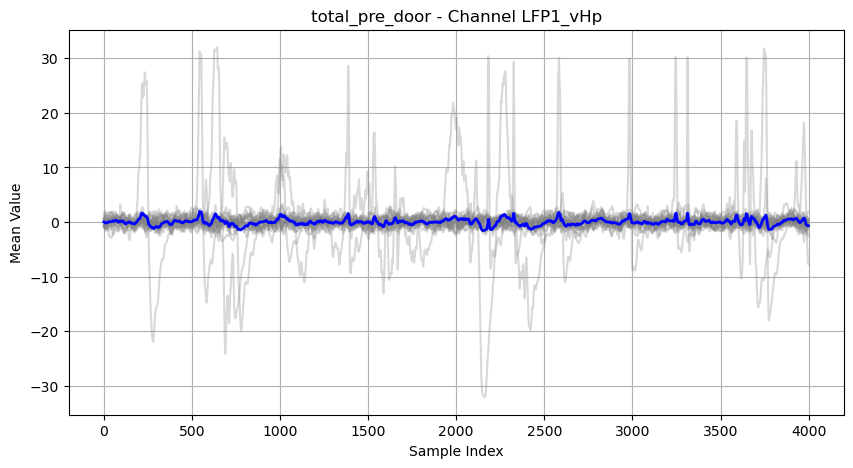

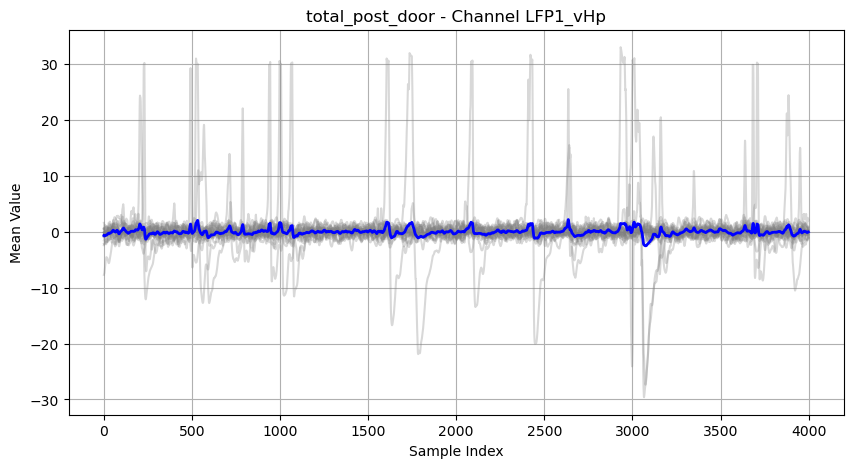

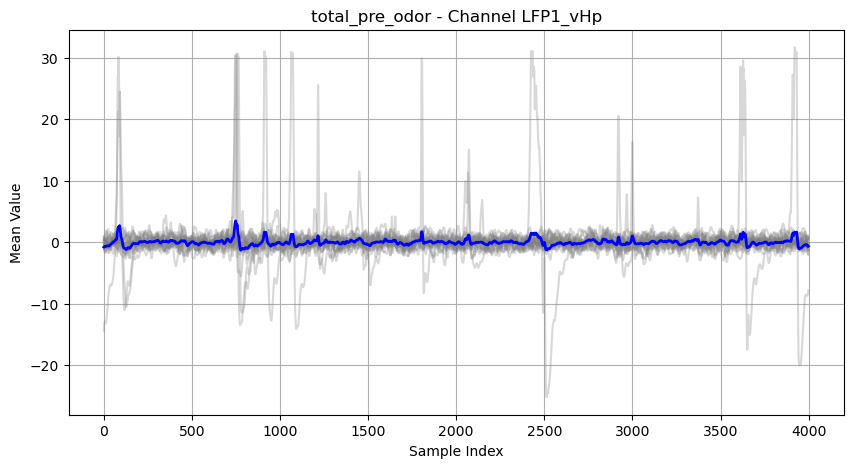

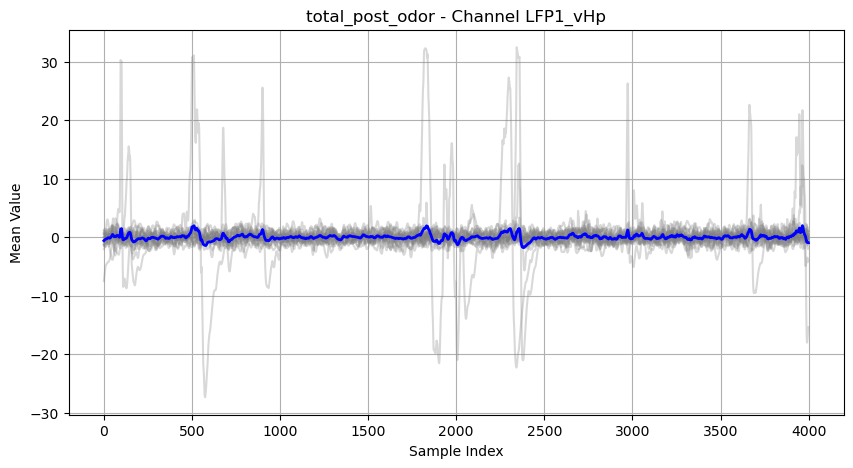

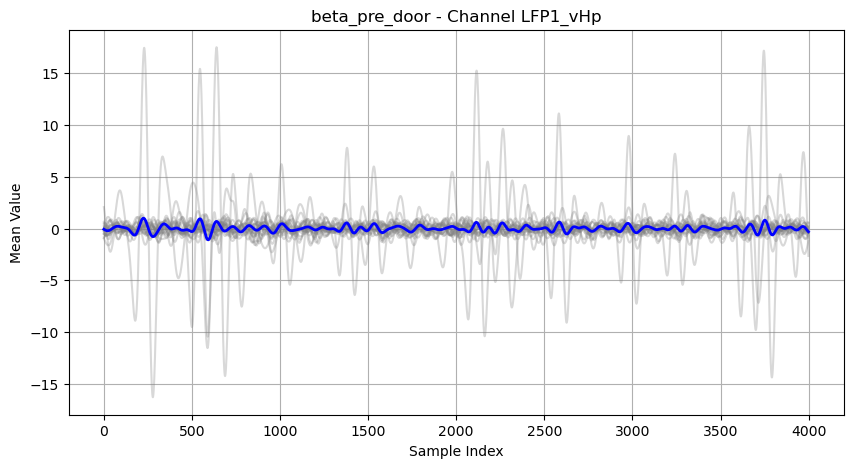

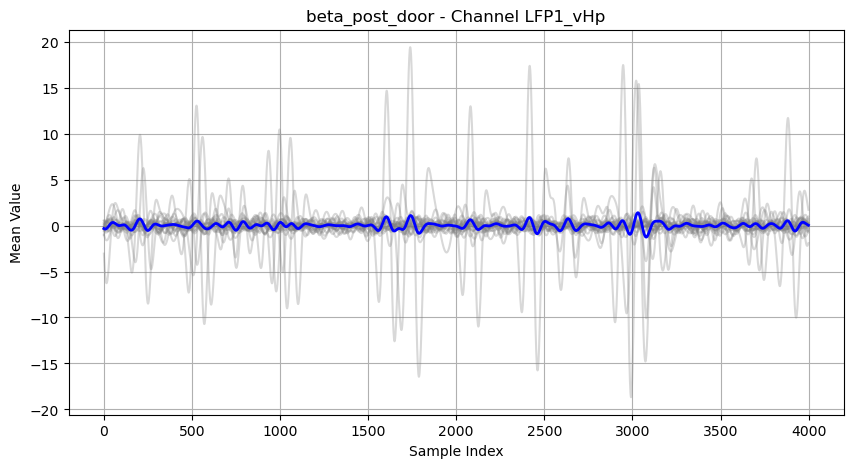

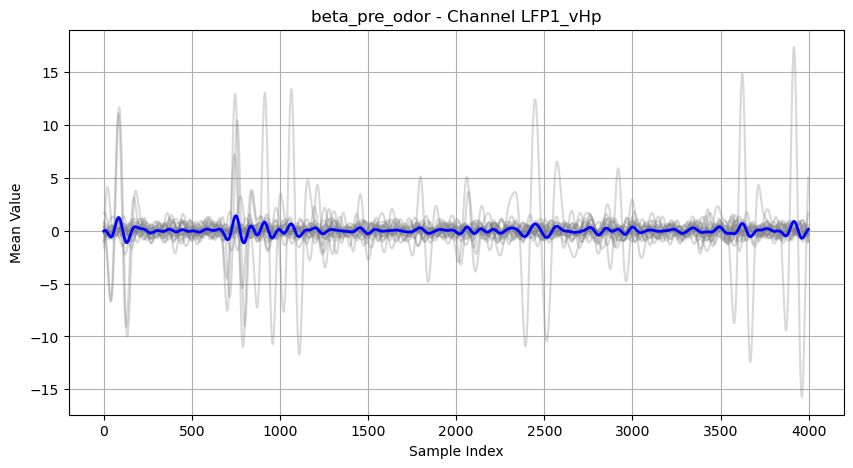

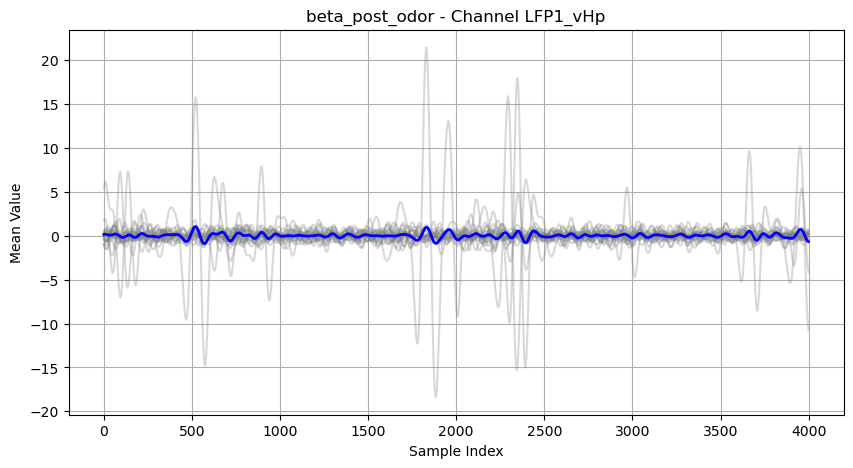

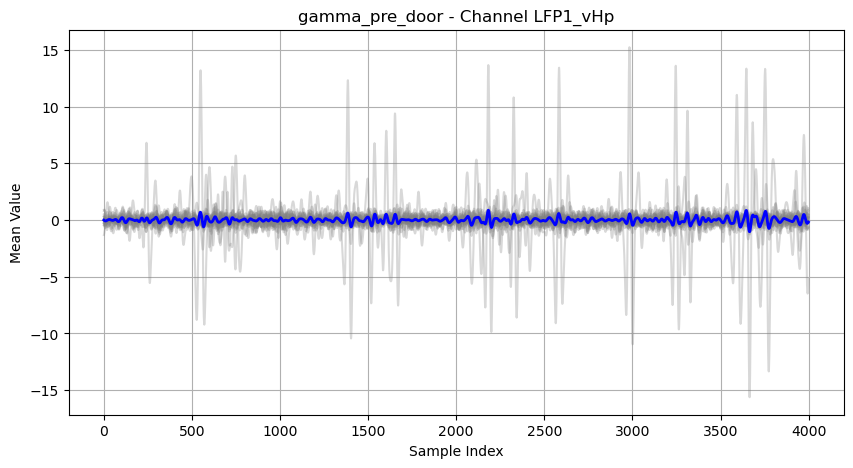

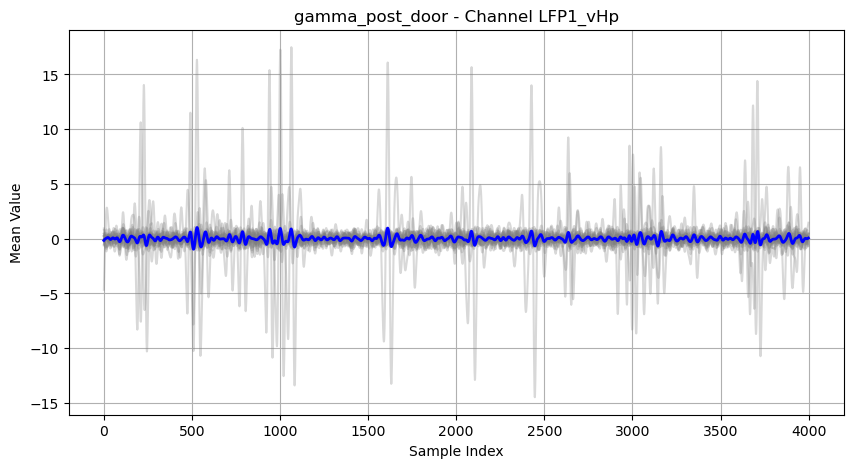

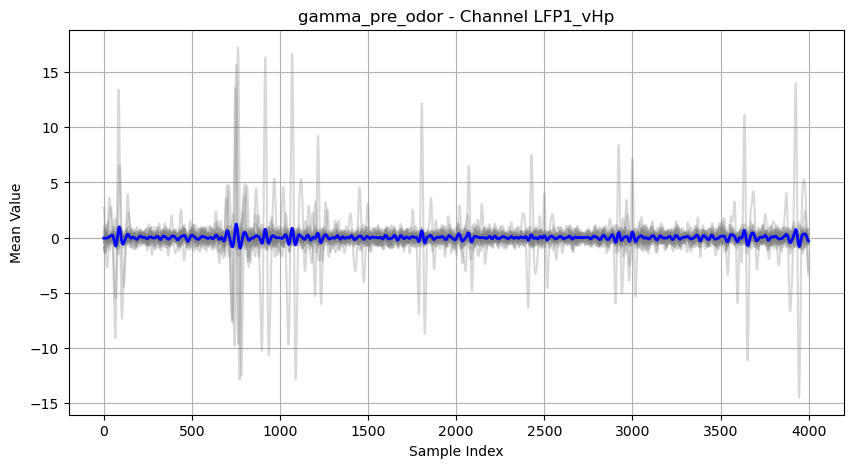

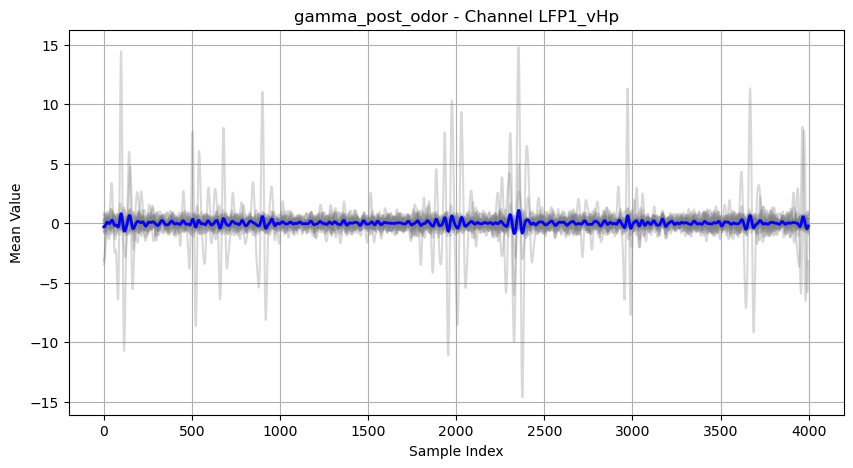

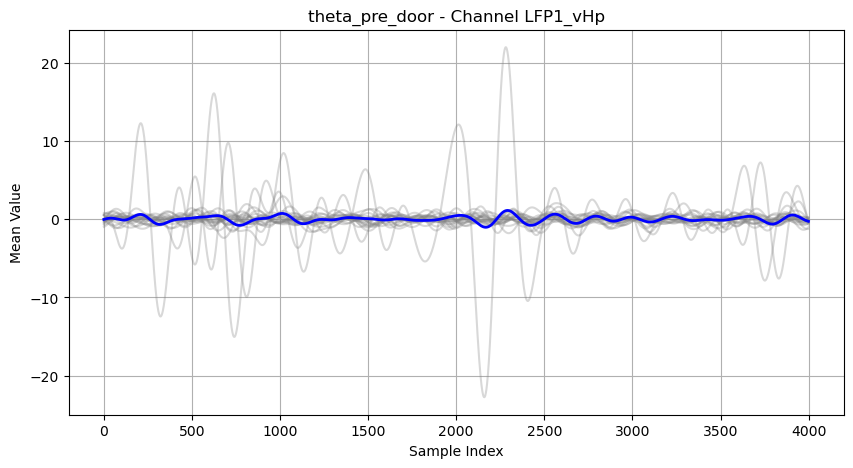

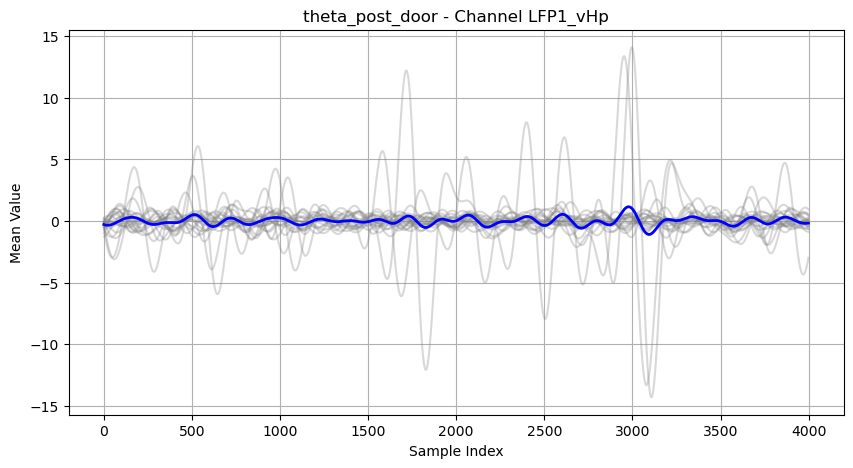

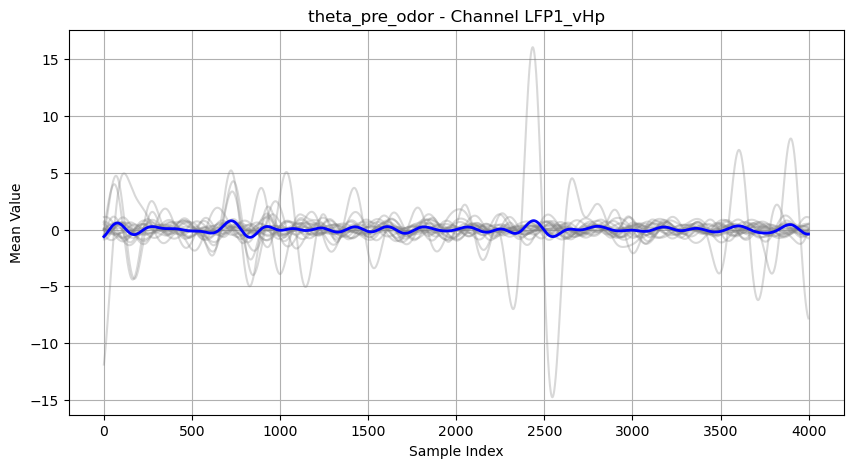

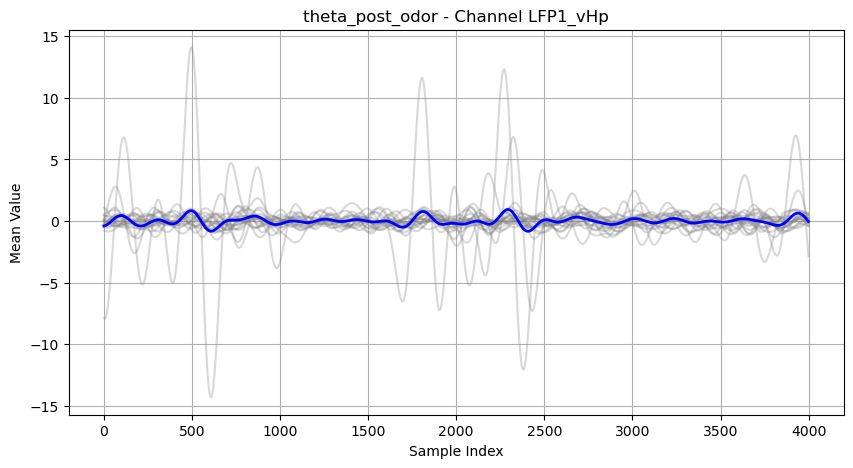

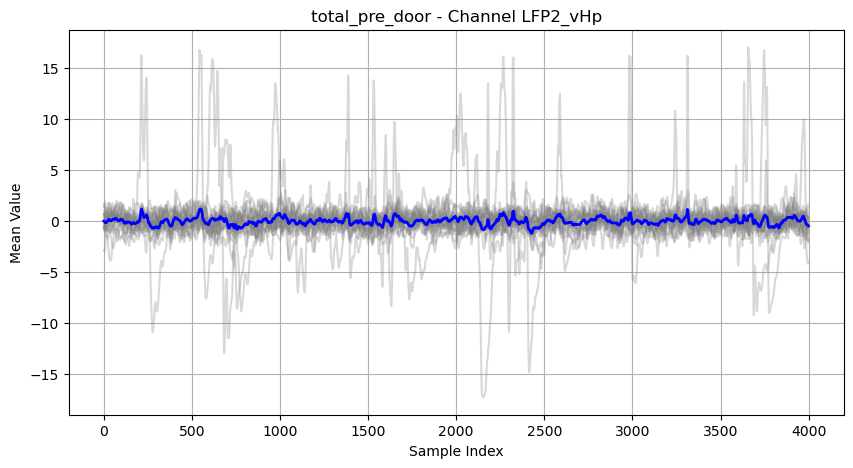

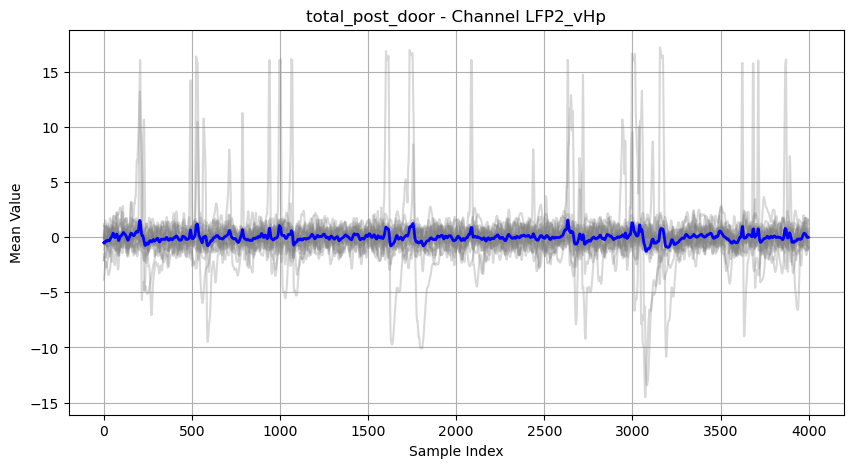

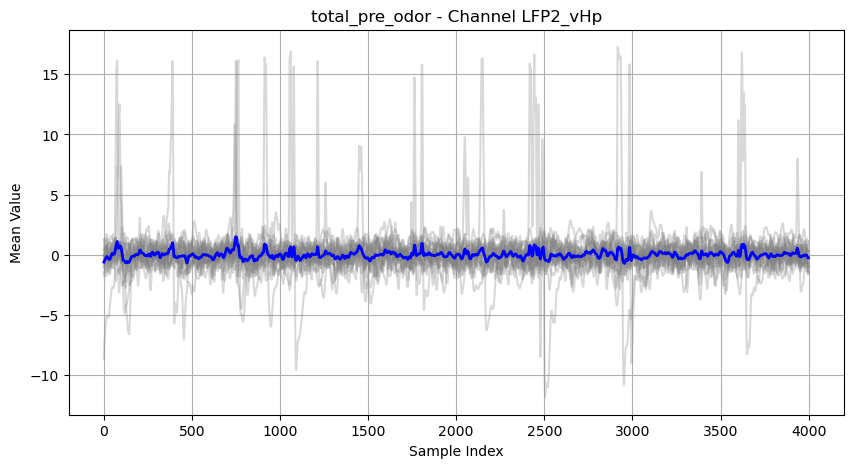

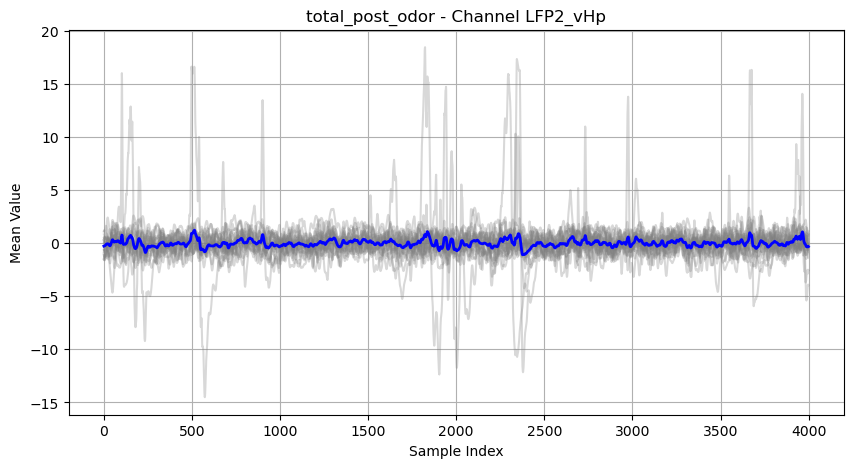

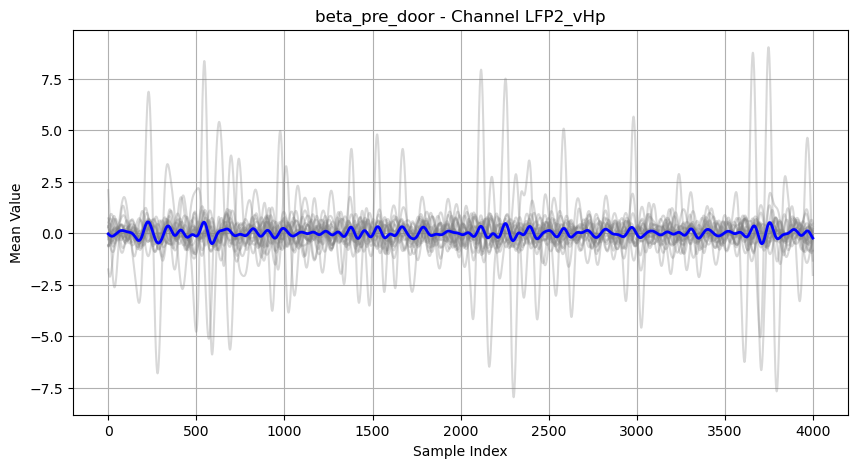

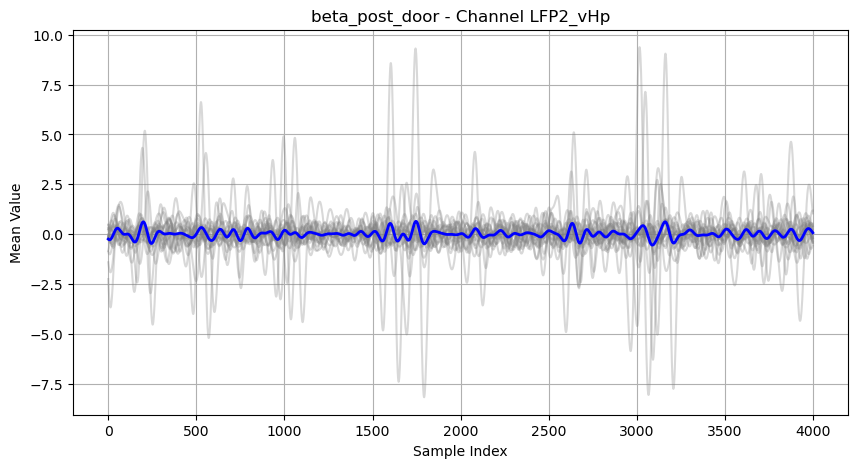

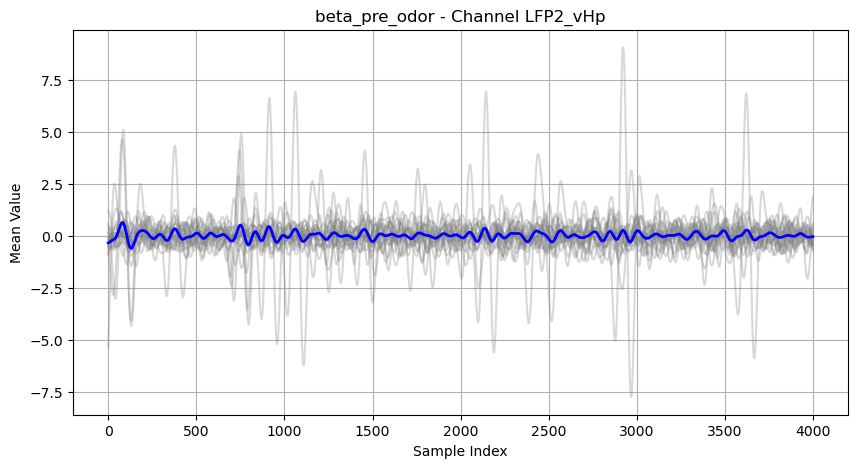

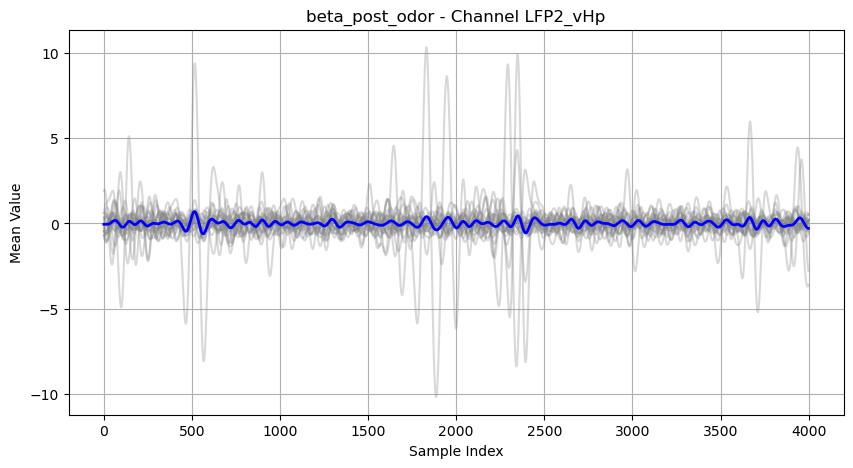

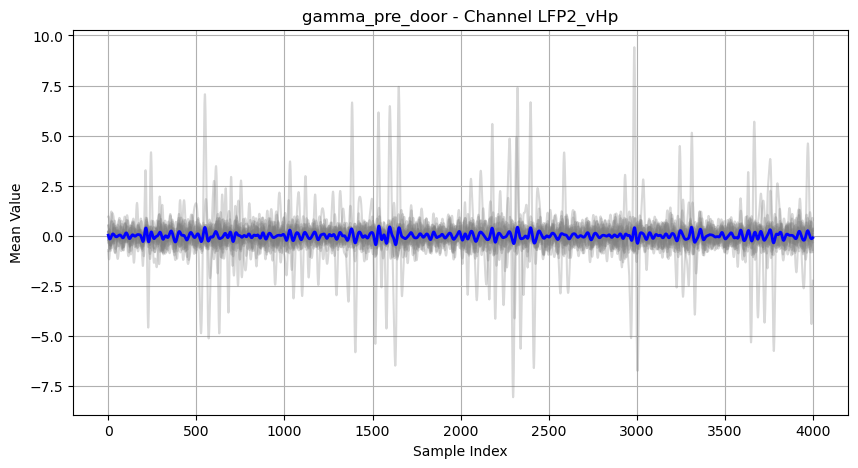

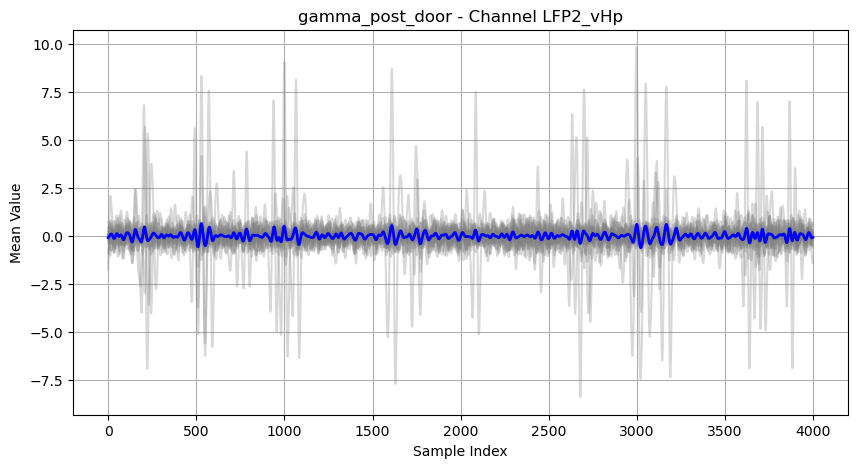

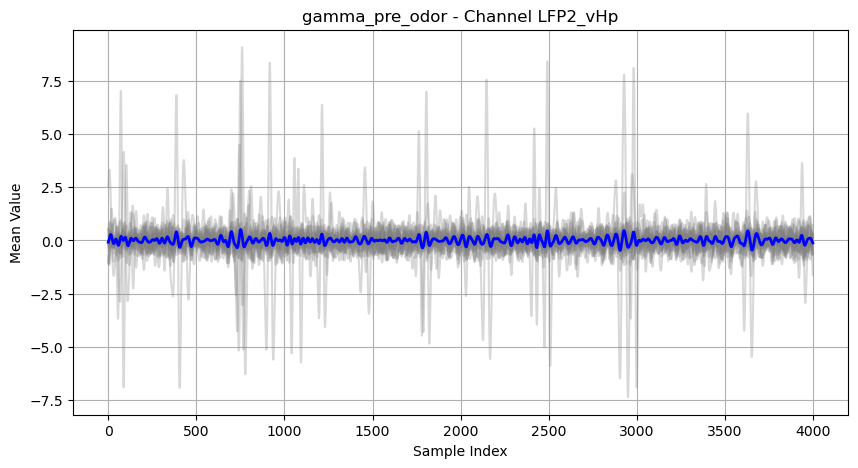

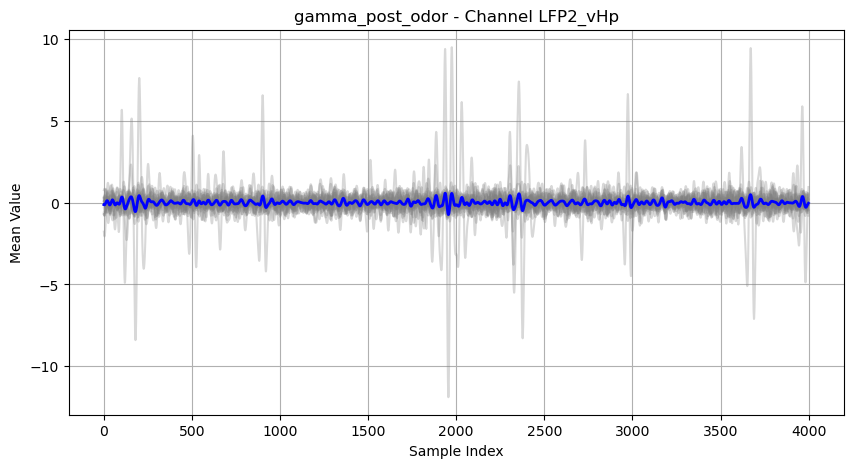

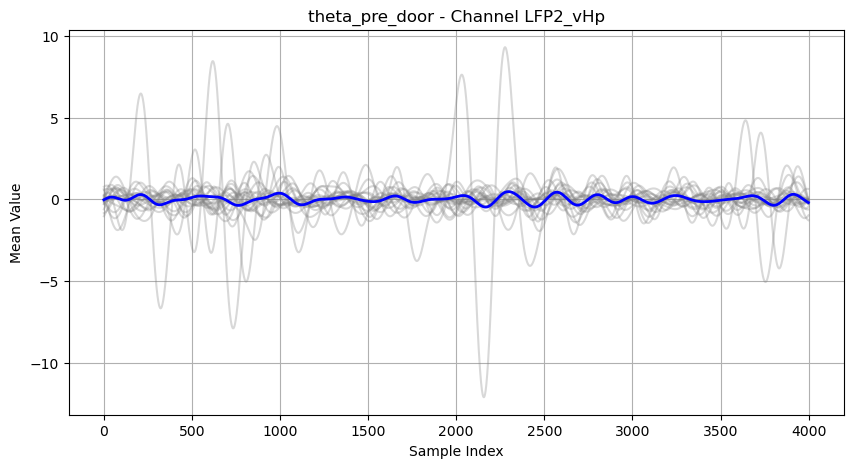

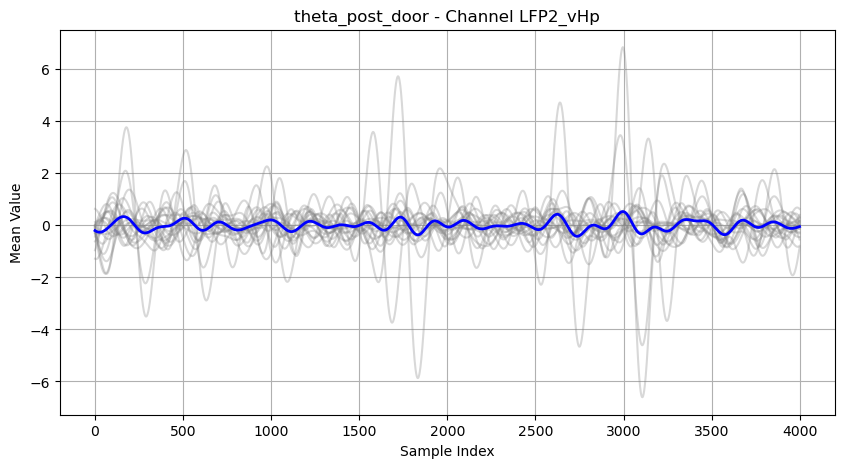

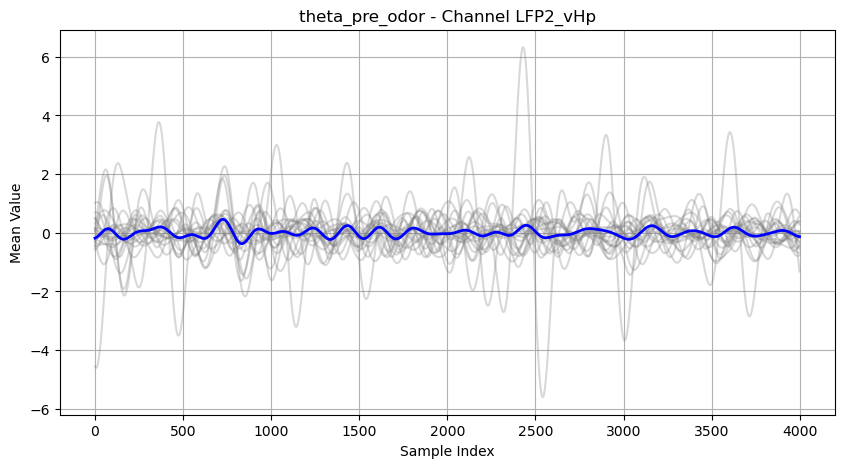

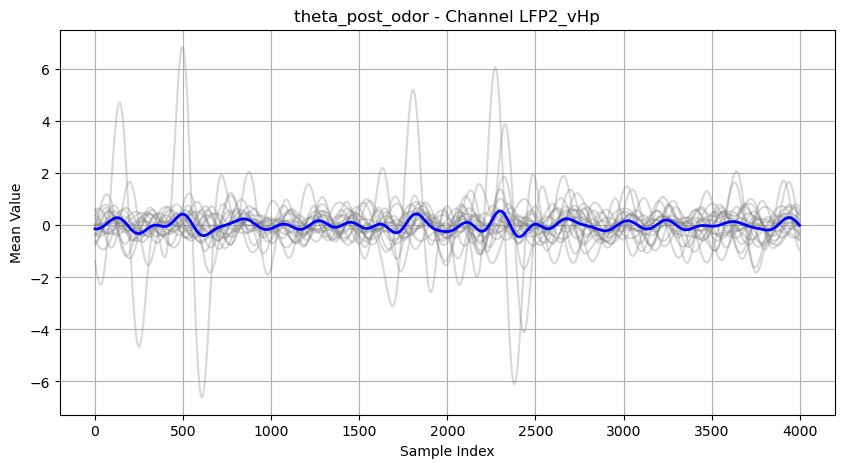

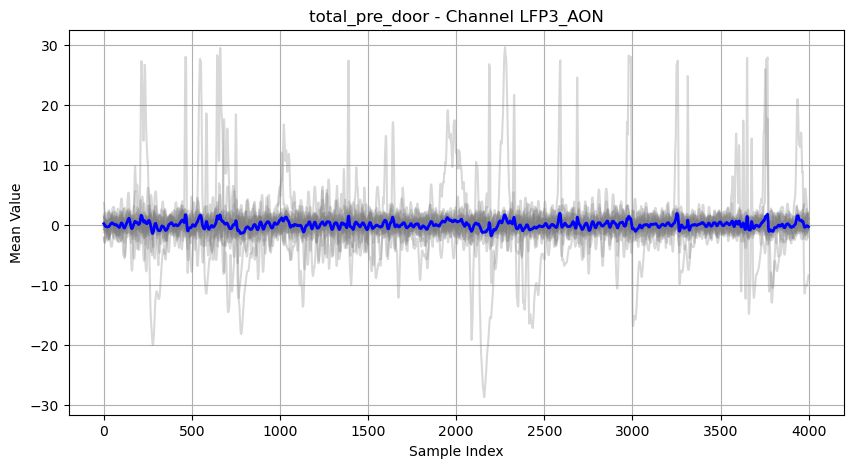

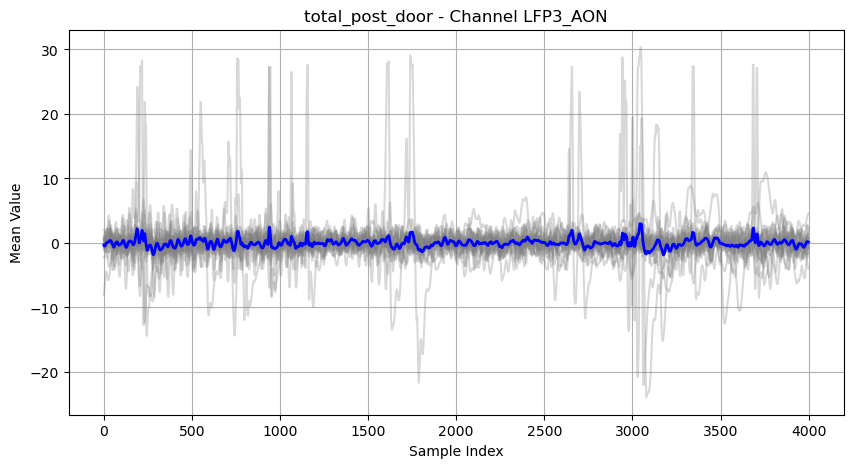

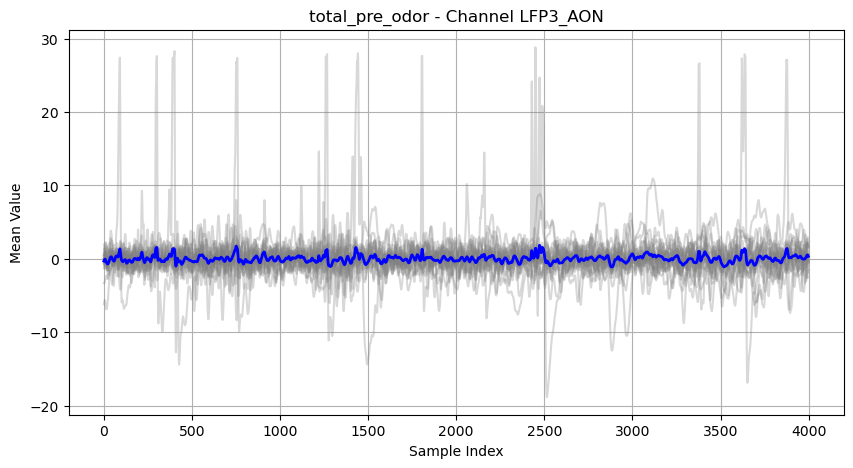

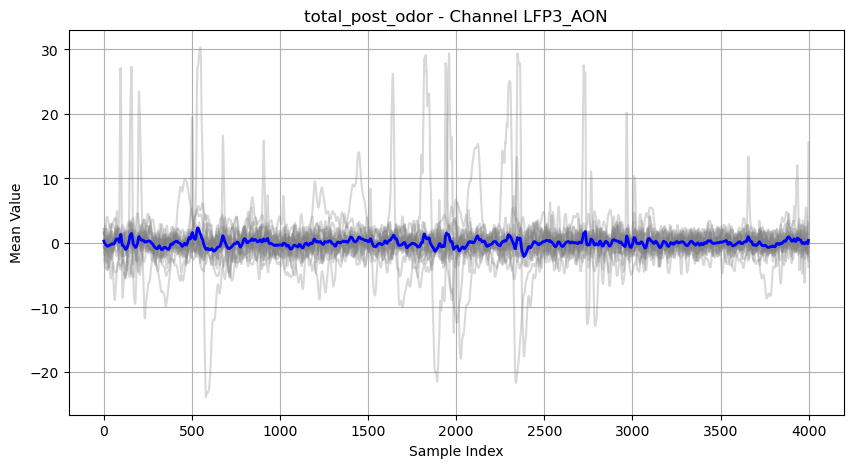

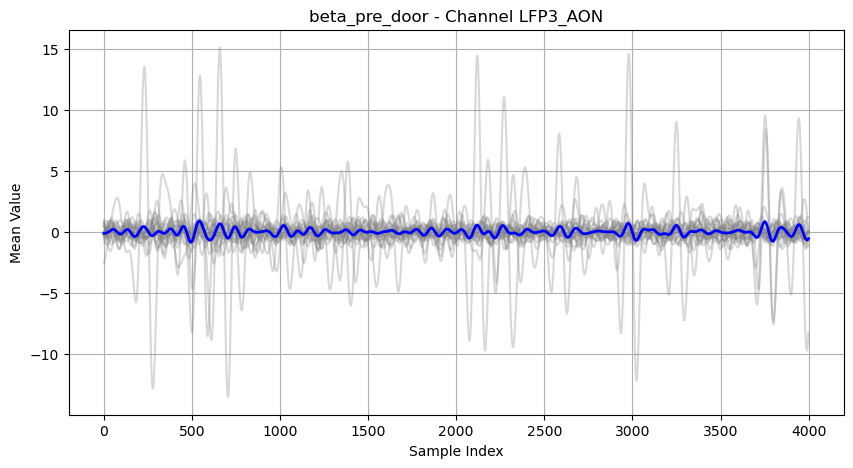

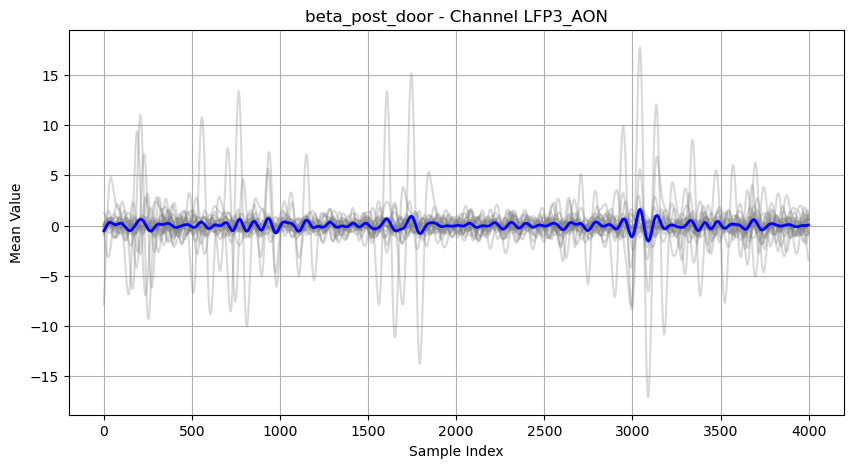

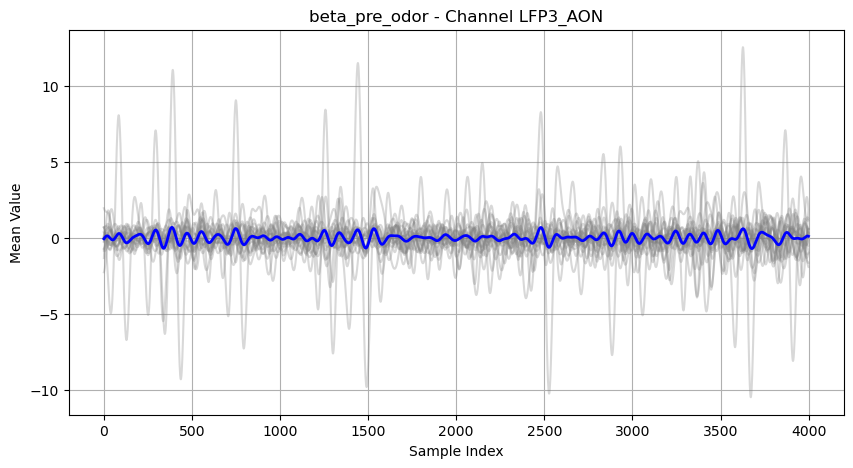

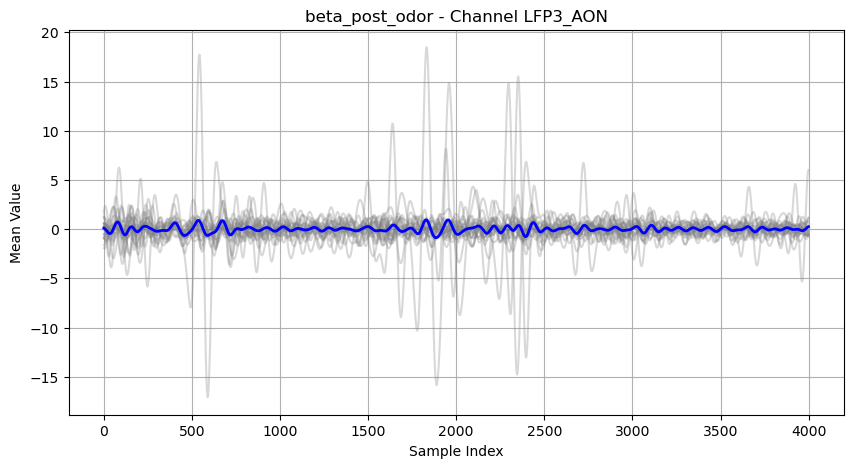

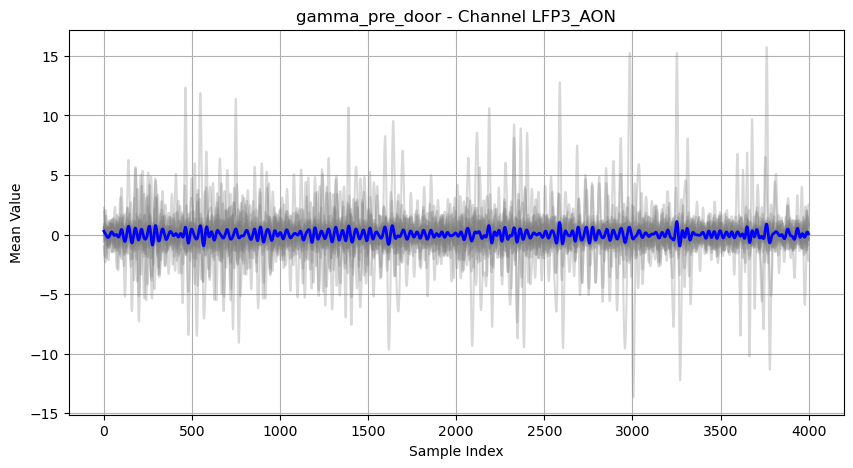

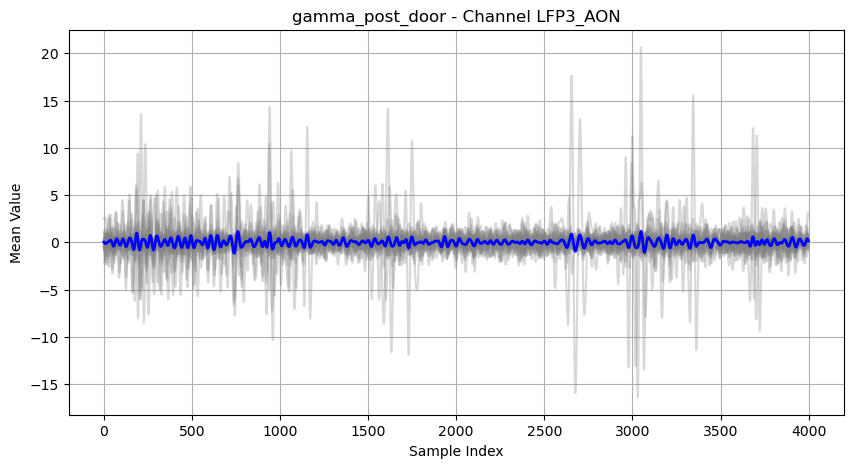

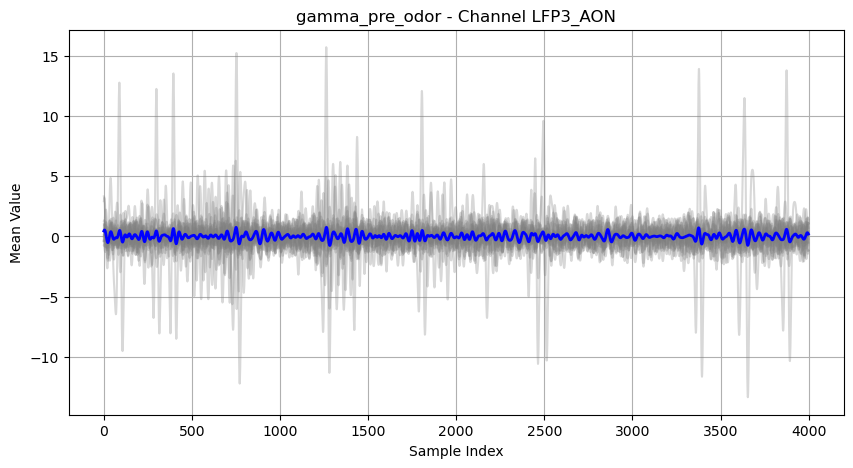

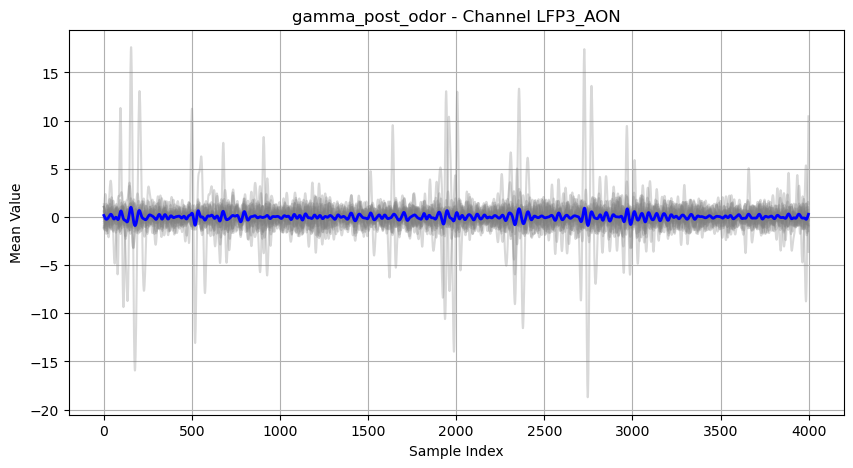

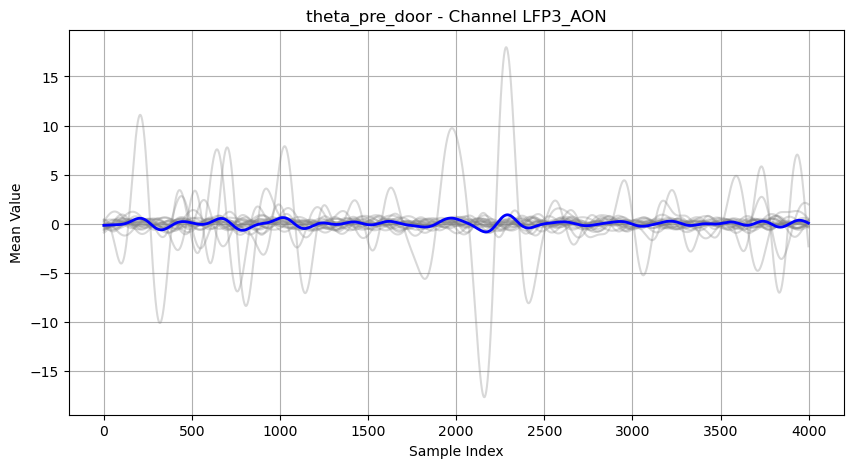

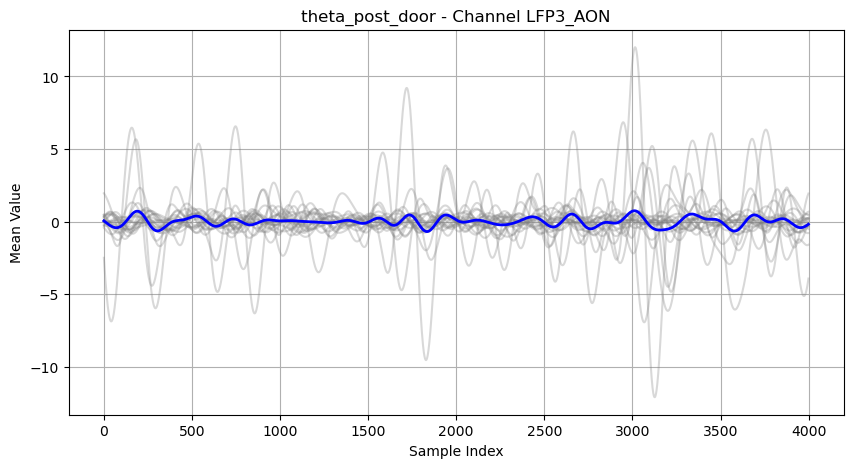

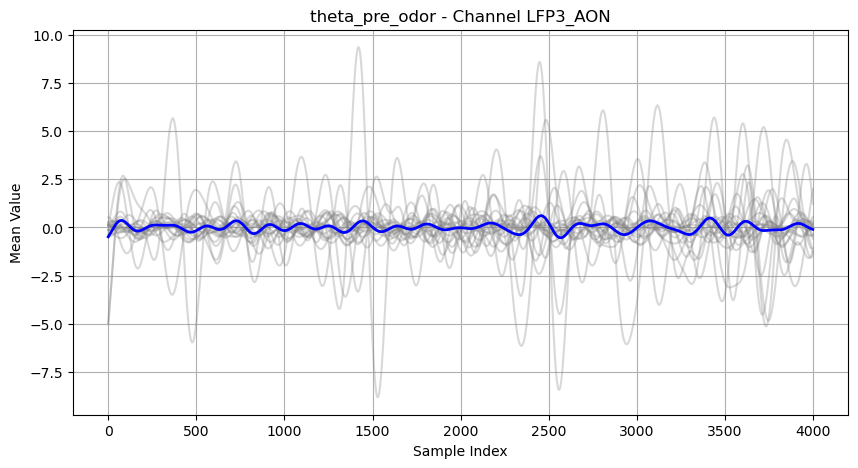

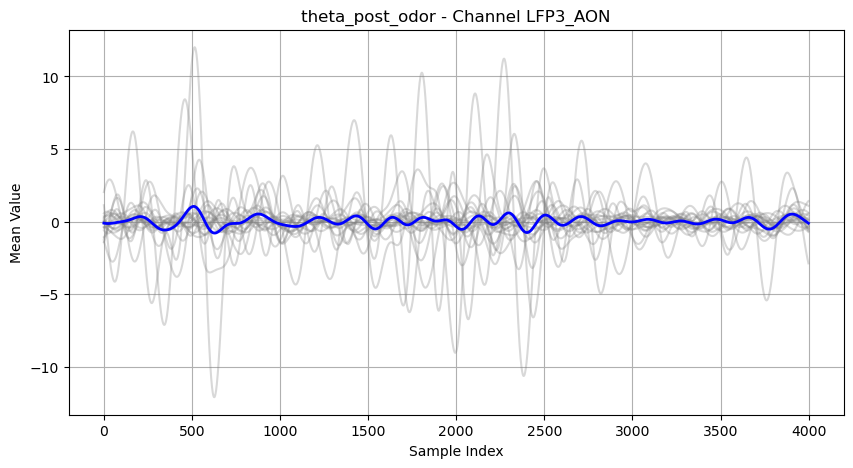

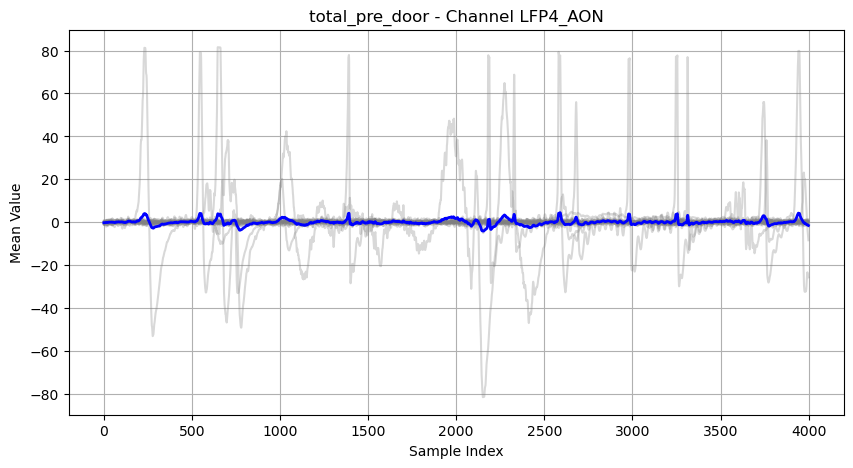

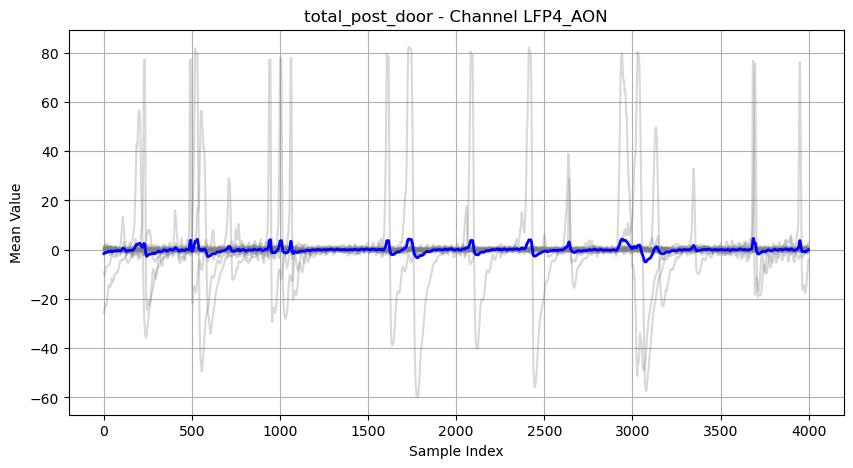

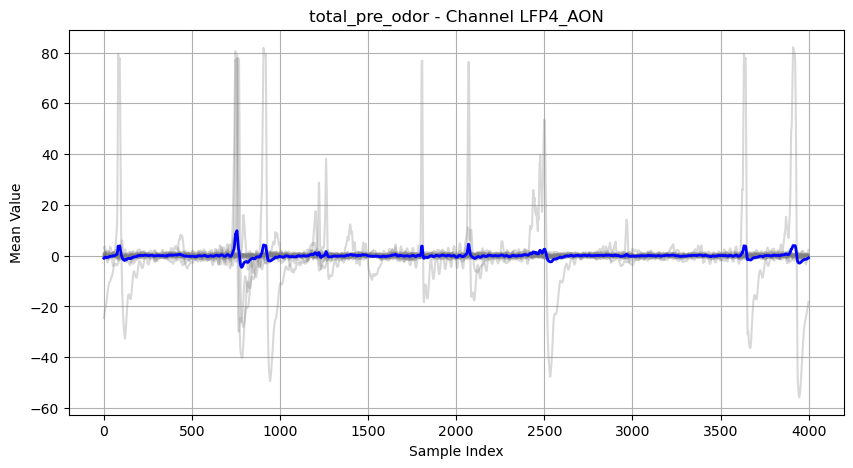

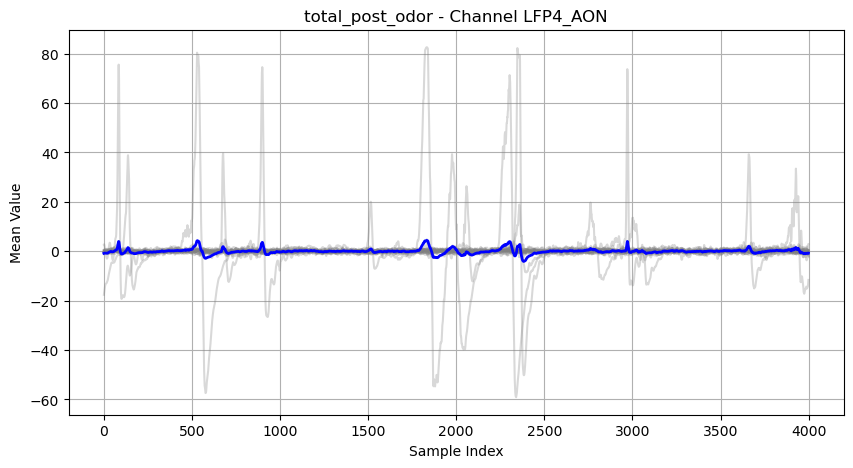

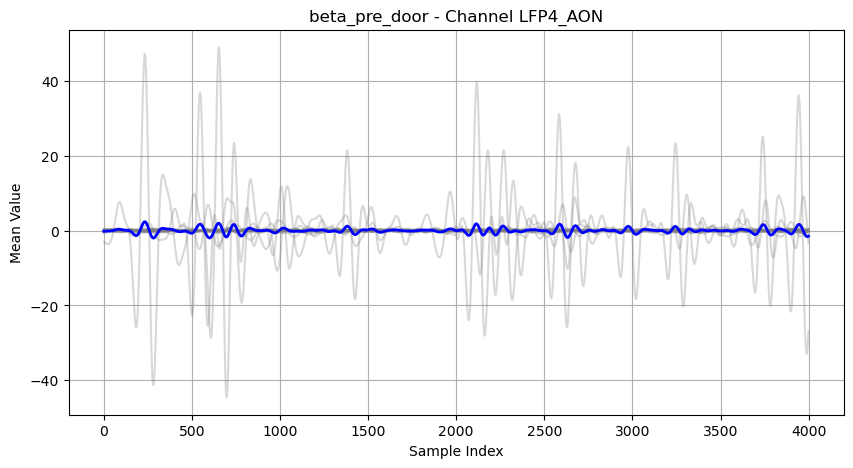

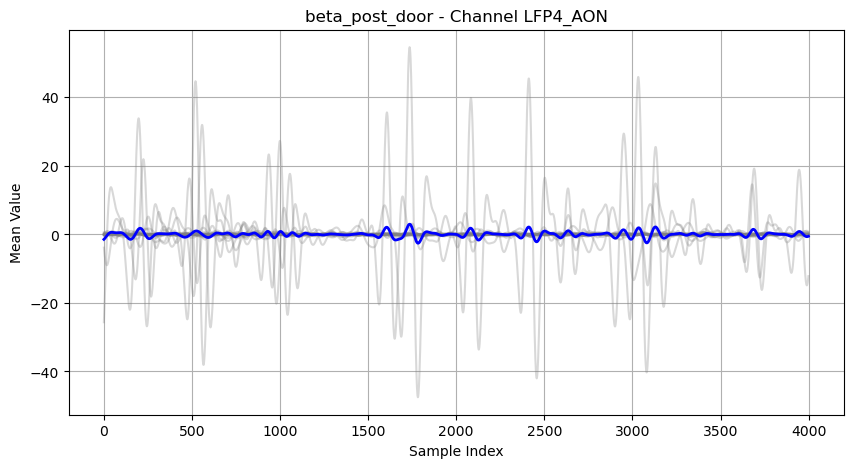

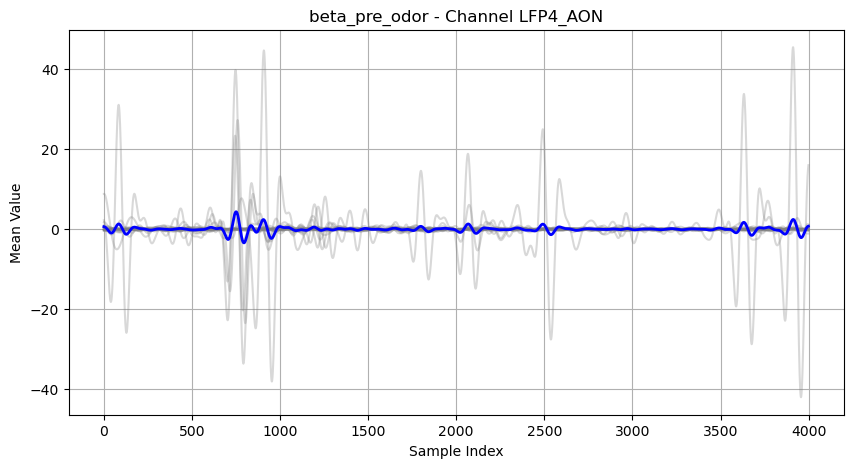

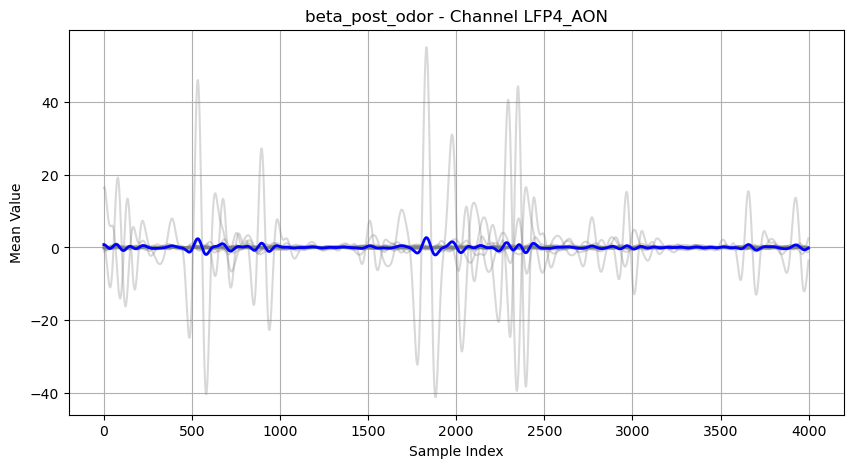

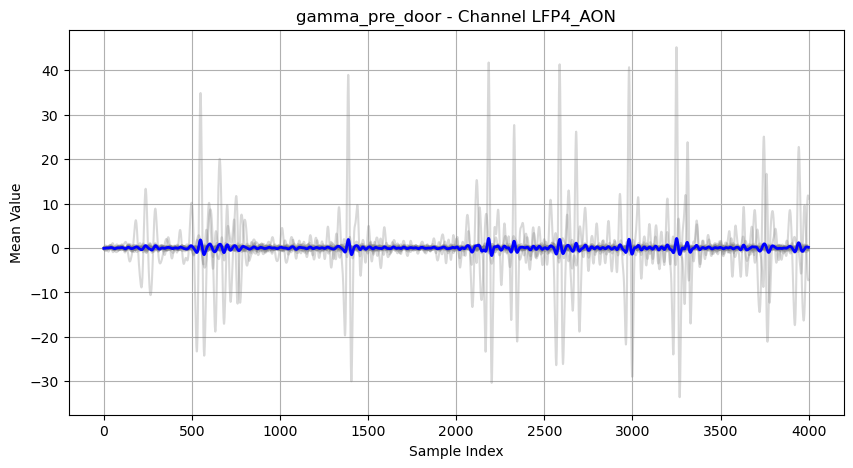

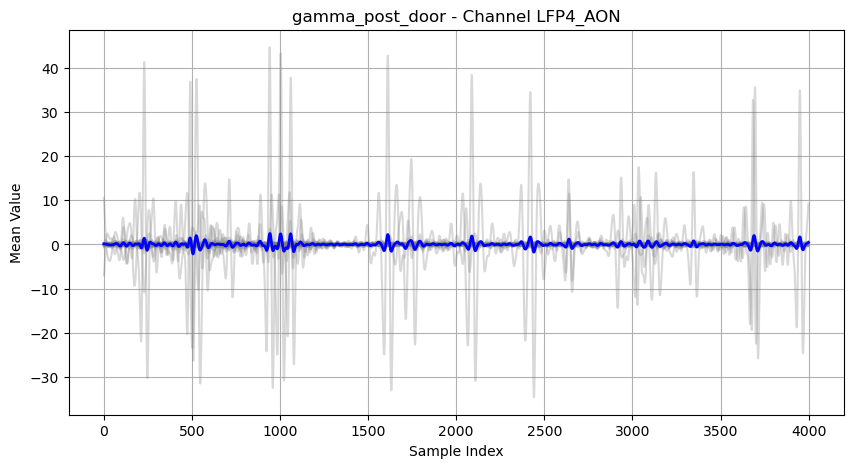

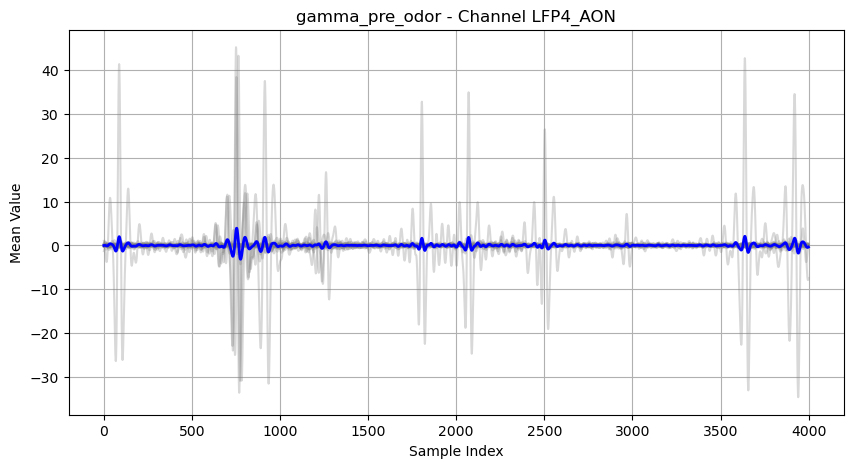

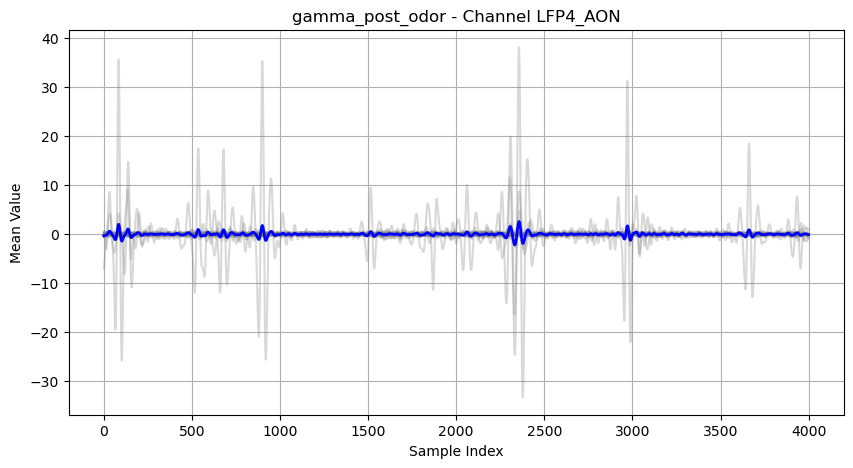

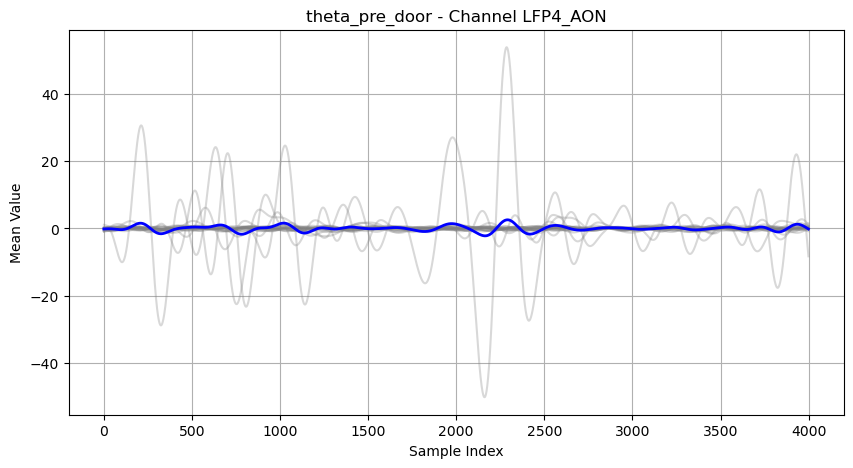

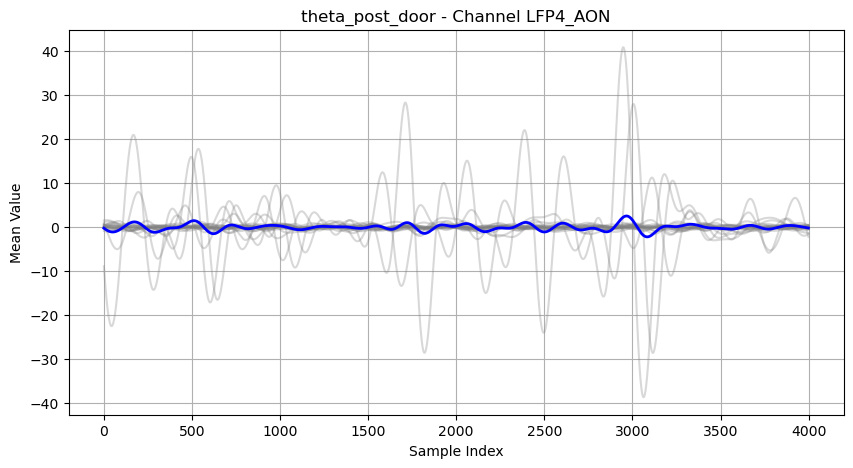

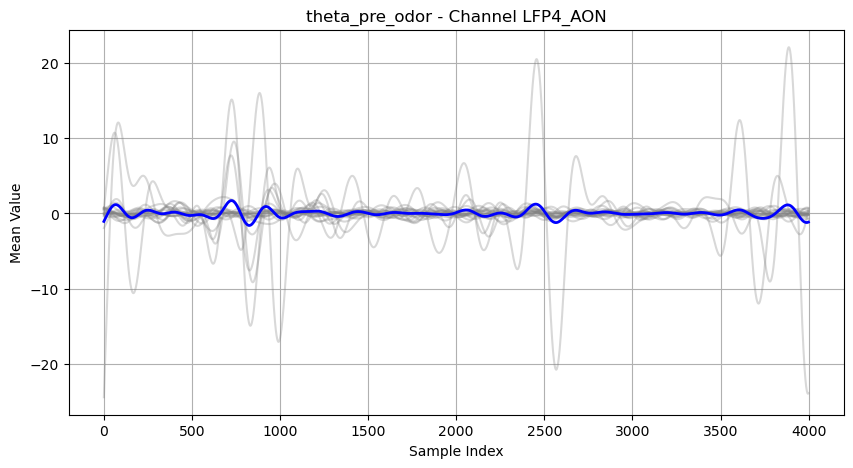

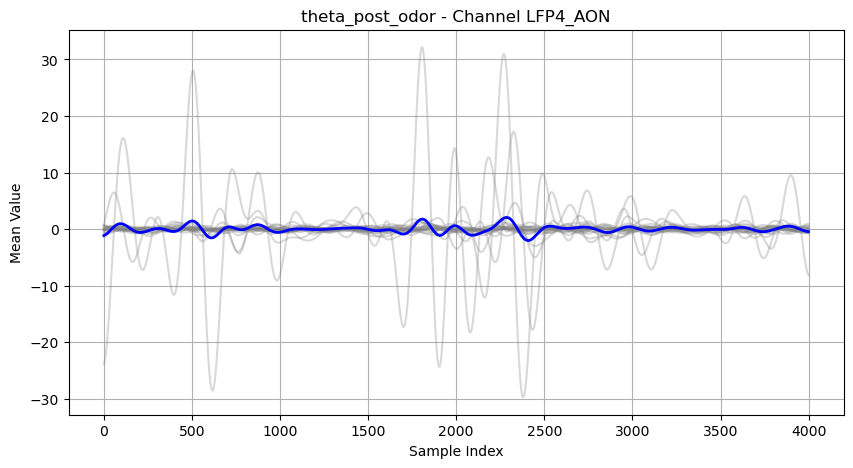

In [4]:
channels=np.unique(waveform_df['channel'])
print(channels)
bands=['total_pre_door', 'total_post_door', 'total_pre_odor', 'total_post_odor',
                            'beta_pre_door', 'beta_post_door', 'beta_pre_odor', 'beta_post_odor',
                            'gamma_pre_door', 'gamma_post_door', 'gamma_pre_odor', 'gamma_post_odor',
                            'theta_pre_door', 'theta_post_door', 'theta_pre_odor', 'theta_post_odor']
for channel in channels:
    channel_df=waveform_df[waveform_df['channel']==channel]
    for bandi in bands:

        data=np.stack(channel_df[bandi].values)
        data_mean = np.mean(data, axis=0)
        plt.figure(figsize=(10, 5))
        
        # Plot individual rows as faint lines
        for row in data:
            plt.plot(row, color='gray', alpha=0.3)
        
        # Plot the mean as a prominent line
        plt.plot(data_mean, color='blue', linewidth=2)
        
        plt.title(f'{bandi} - Channel {channel}')
        plt.xlabel('Sample Index')
        plt.ylabel('Mean Value')
        plt.grid(True)
        plt.show()

['LFP1_vHp' 'LFP2_vHp' 'LFP3_AON' 'LFP4_AON']


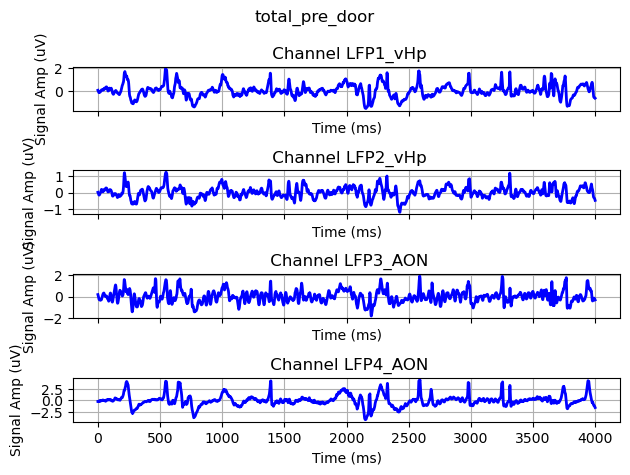

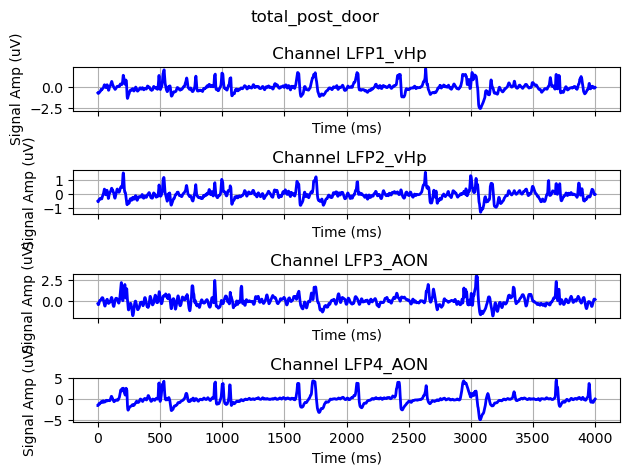

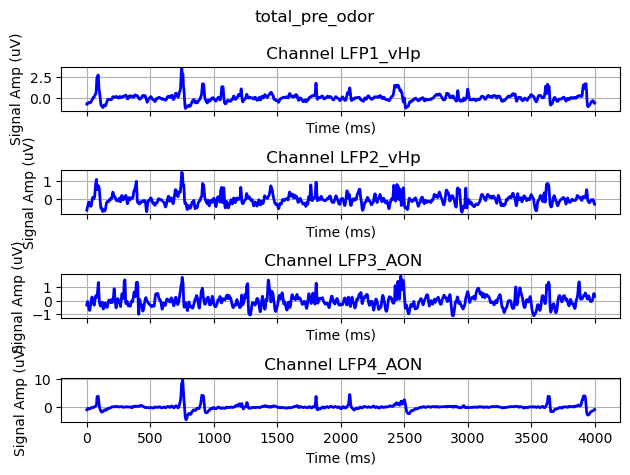

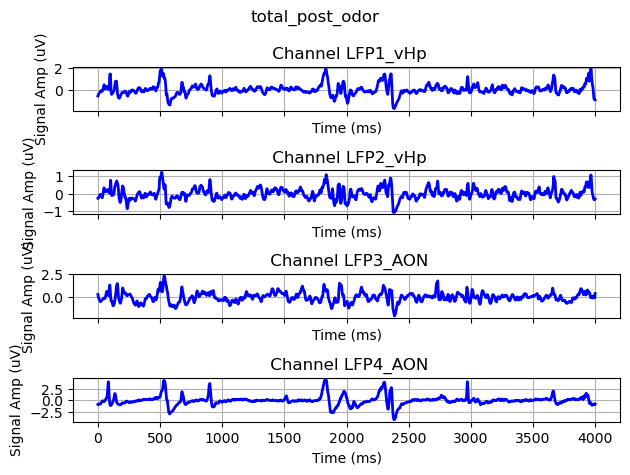

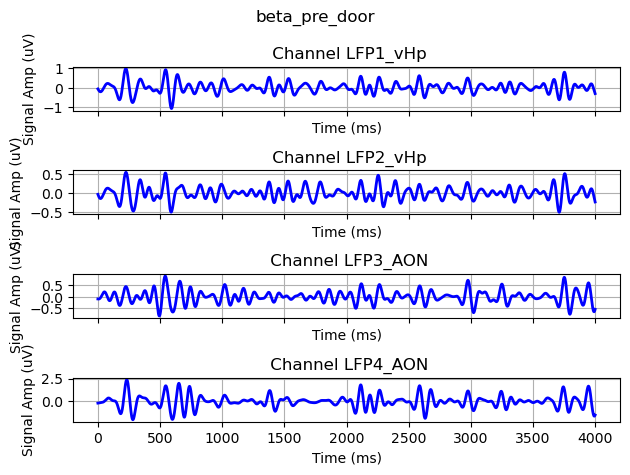

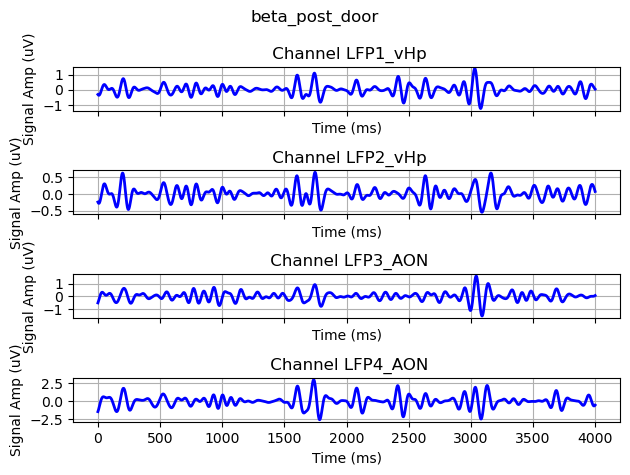

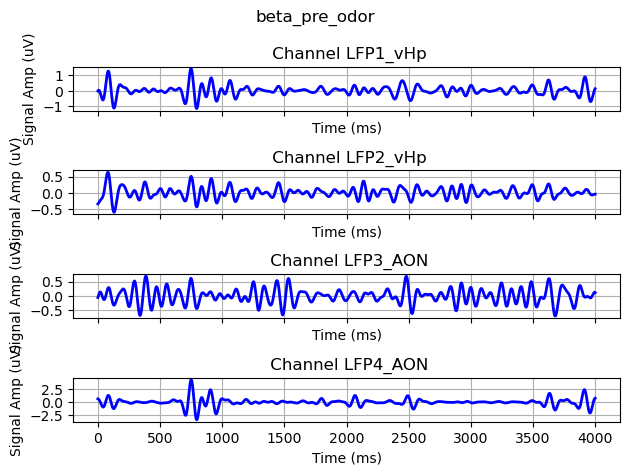

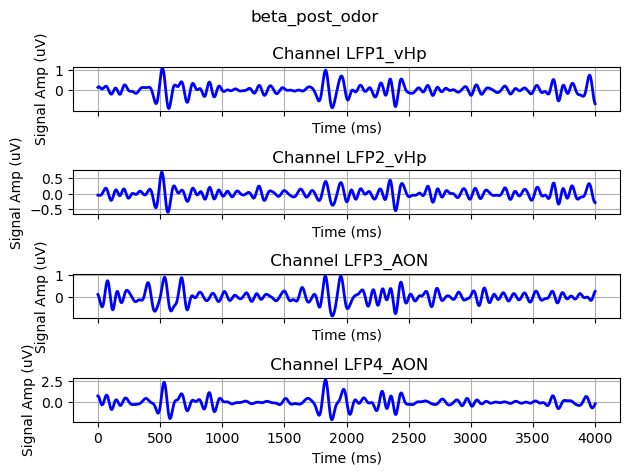

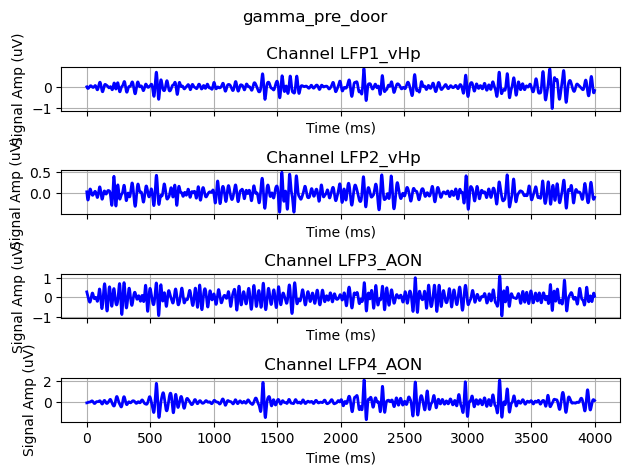

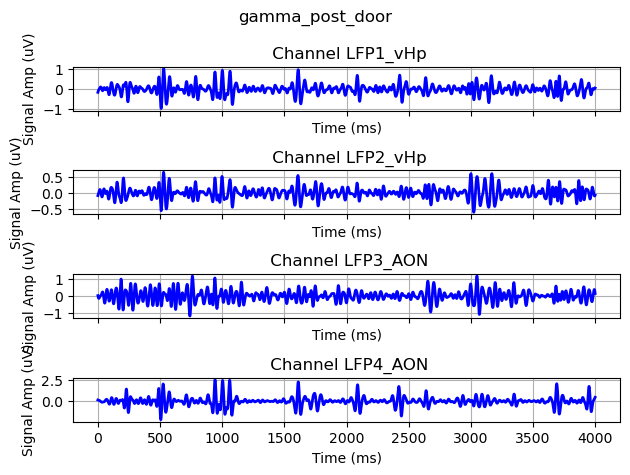

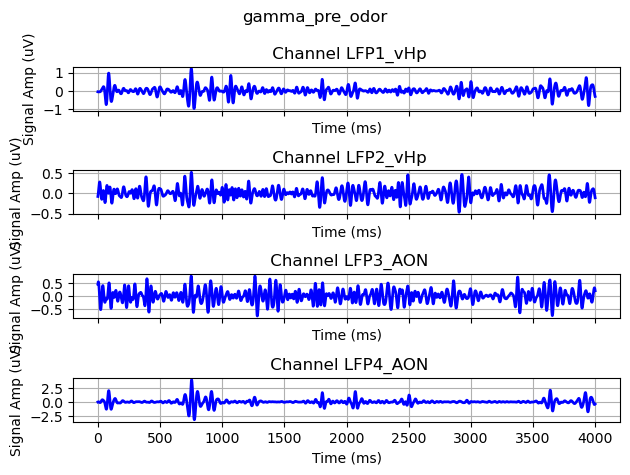

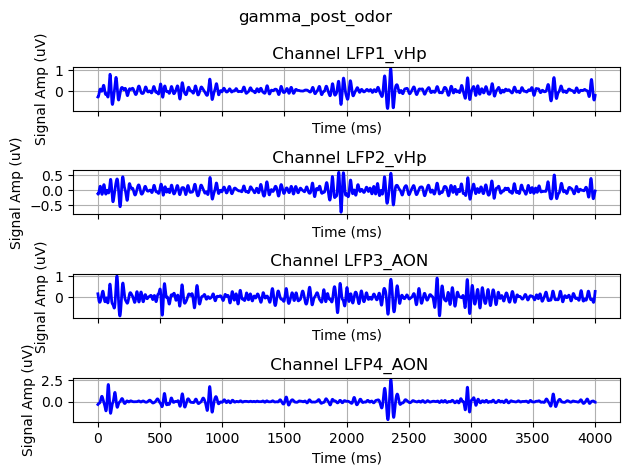

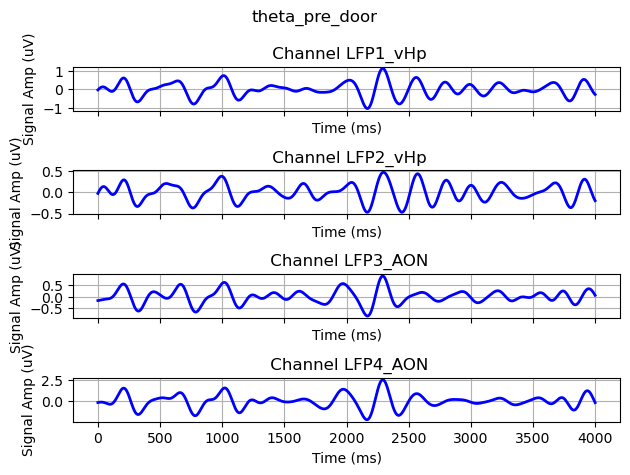

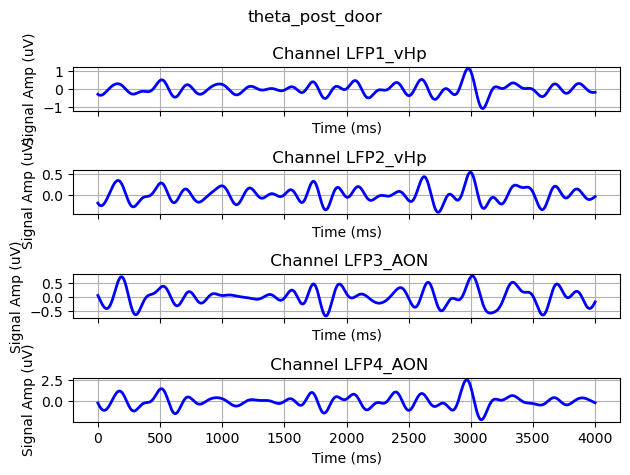

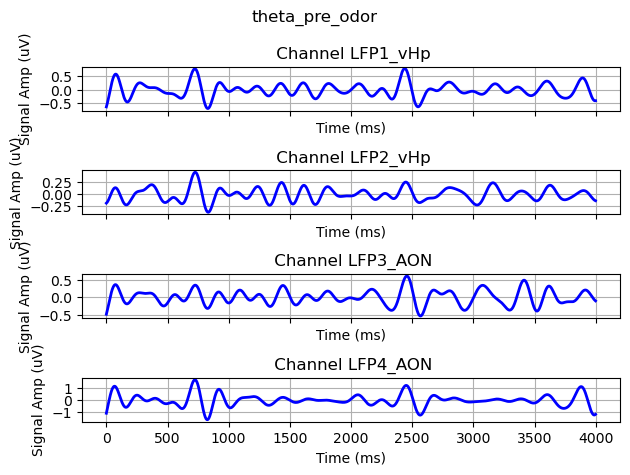

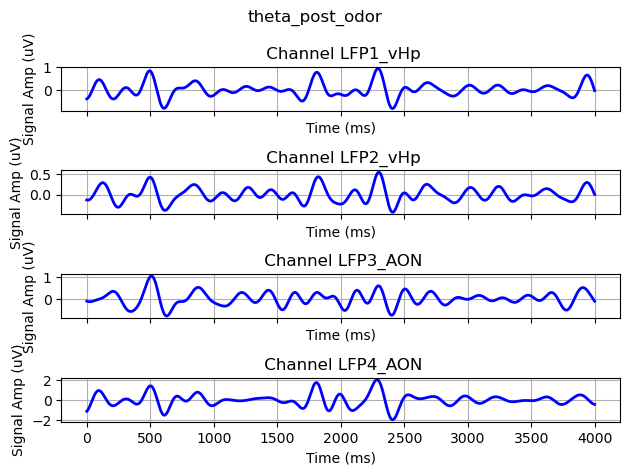

In [6]:
import pandas as pd
import numpy as np

channels = np.unique(waveform_df['channel'])
print(channels)
bands = ['total_pre_door', 'total_post_door', 'total_pre_odor', 'total_post_odor',
         'beta_pre_door', 'beta_post_door', 'beta_pre_odor', 'beta_post_odor',
         'gamma_pre_door', 'gamma_post_door', 'gamma_pre_odor', 'gamma_post_odor',
         'theta_pre_door', 'theta_post_door', 'theta_pre_odor', 'theta_post_odor']

for bandi in bands:
    band_df = waveform_df[[bandi]].copy()  # Extract the band column and make a copy
    band_df = pd.concat([band_df, waveform_df[['channel']]], axis=1)  # Concatenate along columns
    fig, axs=plt.subplots(len(channels),1, sharex=True)
    fig.suptitle(bandi)
    axs=axs.flatten()
    for i,channeli in enumerate(channels):
        channel_df=band_df[band_df['channel']==channeli]
        
        data=np.stack(channel_df[bandi].values)
        data_mean = np.mean(data, axis=0)
        ax=axs[i]
        # Plot individual rows as faint lines
        # for row in data:
        #     ax.plot(row, color='gray', alpha=0.3)
        
        # Plot the mean as a prominent line
        ax.plot(data_mean, color='blue', linewidth=2)
        ax.grid(True)
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Signal Amp (uV)')
        ax.set_title(f' Channel {channeli}')

    plt.tight_layout()  # Adjust the vertical space between subplots
    plt.show()
        #continue  # Placeholder for further processing

In [ ]:
import matplotlib.pyplot as plt
# Plot the mean
plt.figure(figsize=(10, 5))
plt.plot(beta_pre_door_mean)
plt.title('Mean of beta_pre_door_data')
plt.xlabel('Sample Index')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import re

channels = np.unique(waveform_df['channel'])
print(channels)

for channel in channels:
    channel_df = waveform_df[waveform_df['channel'] == channel]
    
    # Convert string representations of arrays to actual numpy arrays
    def convert_to_array(x):
        if isinstance(x, str):
            # Remove any non-numeric characters except for commas, dots, and minus signs
            cleaned_str = re.sub(r'[^\d.,-]', '', x)
            # Convert the cleaned string to a numpy array
            return np.fromstring(cleaned_str, sep=',')
        else:
            return np.array(x)
    
    beta_pre_door_data = channel_df['beta_pre_door'].apply(convert_to_array)
    
    # Stack the values into a numpy array
    beta_pre_door_data = np.stack(beta_pre_door_data.values)
    
    # Calculate the mean along the specified axis
    beta_pre_door_mean = np.mean(beta_pre_door_data, axis=0)
    
    print(f"Mean of 'beta_pre_door' for channel {channel}: {beta_pre_door_mean}")